# Time per conformer
Plot how runtime dependence on number of conformations, as well as the approximate time per conformer for CPU, GPU, and MPS benchmarks

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import matplotlib as mpl

mpl.rcParams['xtick.major.pad'] = 1
mpl.rcParams['ytick.major.pad'] = 1

mpl.rcParams['xtick.major.size'] = 2  # Major tick length for x-axis
mpl.rcParams['xtick.minor.size'] = 0.5   # Minor tick length for x-axis
mpl.rcParams['ytick.major.size'] = 2  # Major tick length for y-axis
mpl.rcParams['ytick.minor.size'] = 0.5   # Minor tick length for y-axis

mpl.rcParams['xtick.major.width'] = 0.375  # Major tick width for x-axis
mpl.rcParams['ytick.major.width'] = 0.375  # Major tick width for y-axis
mpl.rcParams['xtick.minor.width'] = 0.375  # Major tick width for x-axis
mpl.rcParams['ytick.minor.width'] = 0.375  # Major tick width for y-axis


	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.375

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


In [2]:
cuda = np.loadtxt('benchmarking_runs/conformer_count/runtime_matrix_30_steps_cuda_100_batchsize_compile_off.csv', delimiter=',').transpose()
mps  = np.loadtxt('benchmarking_runs/conformer_count/runtime_matrix_30_steps_mps_100_batchsize_compile_off.csv', delimiter=',').transpose()
cpu  = np.loadtxt('benchmarking_runs/conformer_count/runtime_matrix_30_steps_cpu_100_batchsize_compile_off.csv', delimiter=',').transpose()

CPU gives 1.1 conformers/second
Apple Silicon (MPS) gives 19.5 conformers/second
GPU (CUDA) gives 34.9 conformers/second


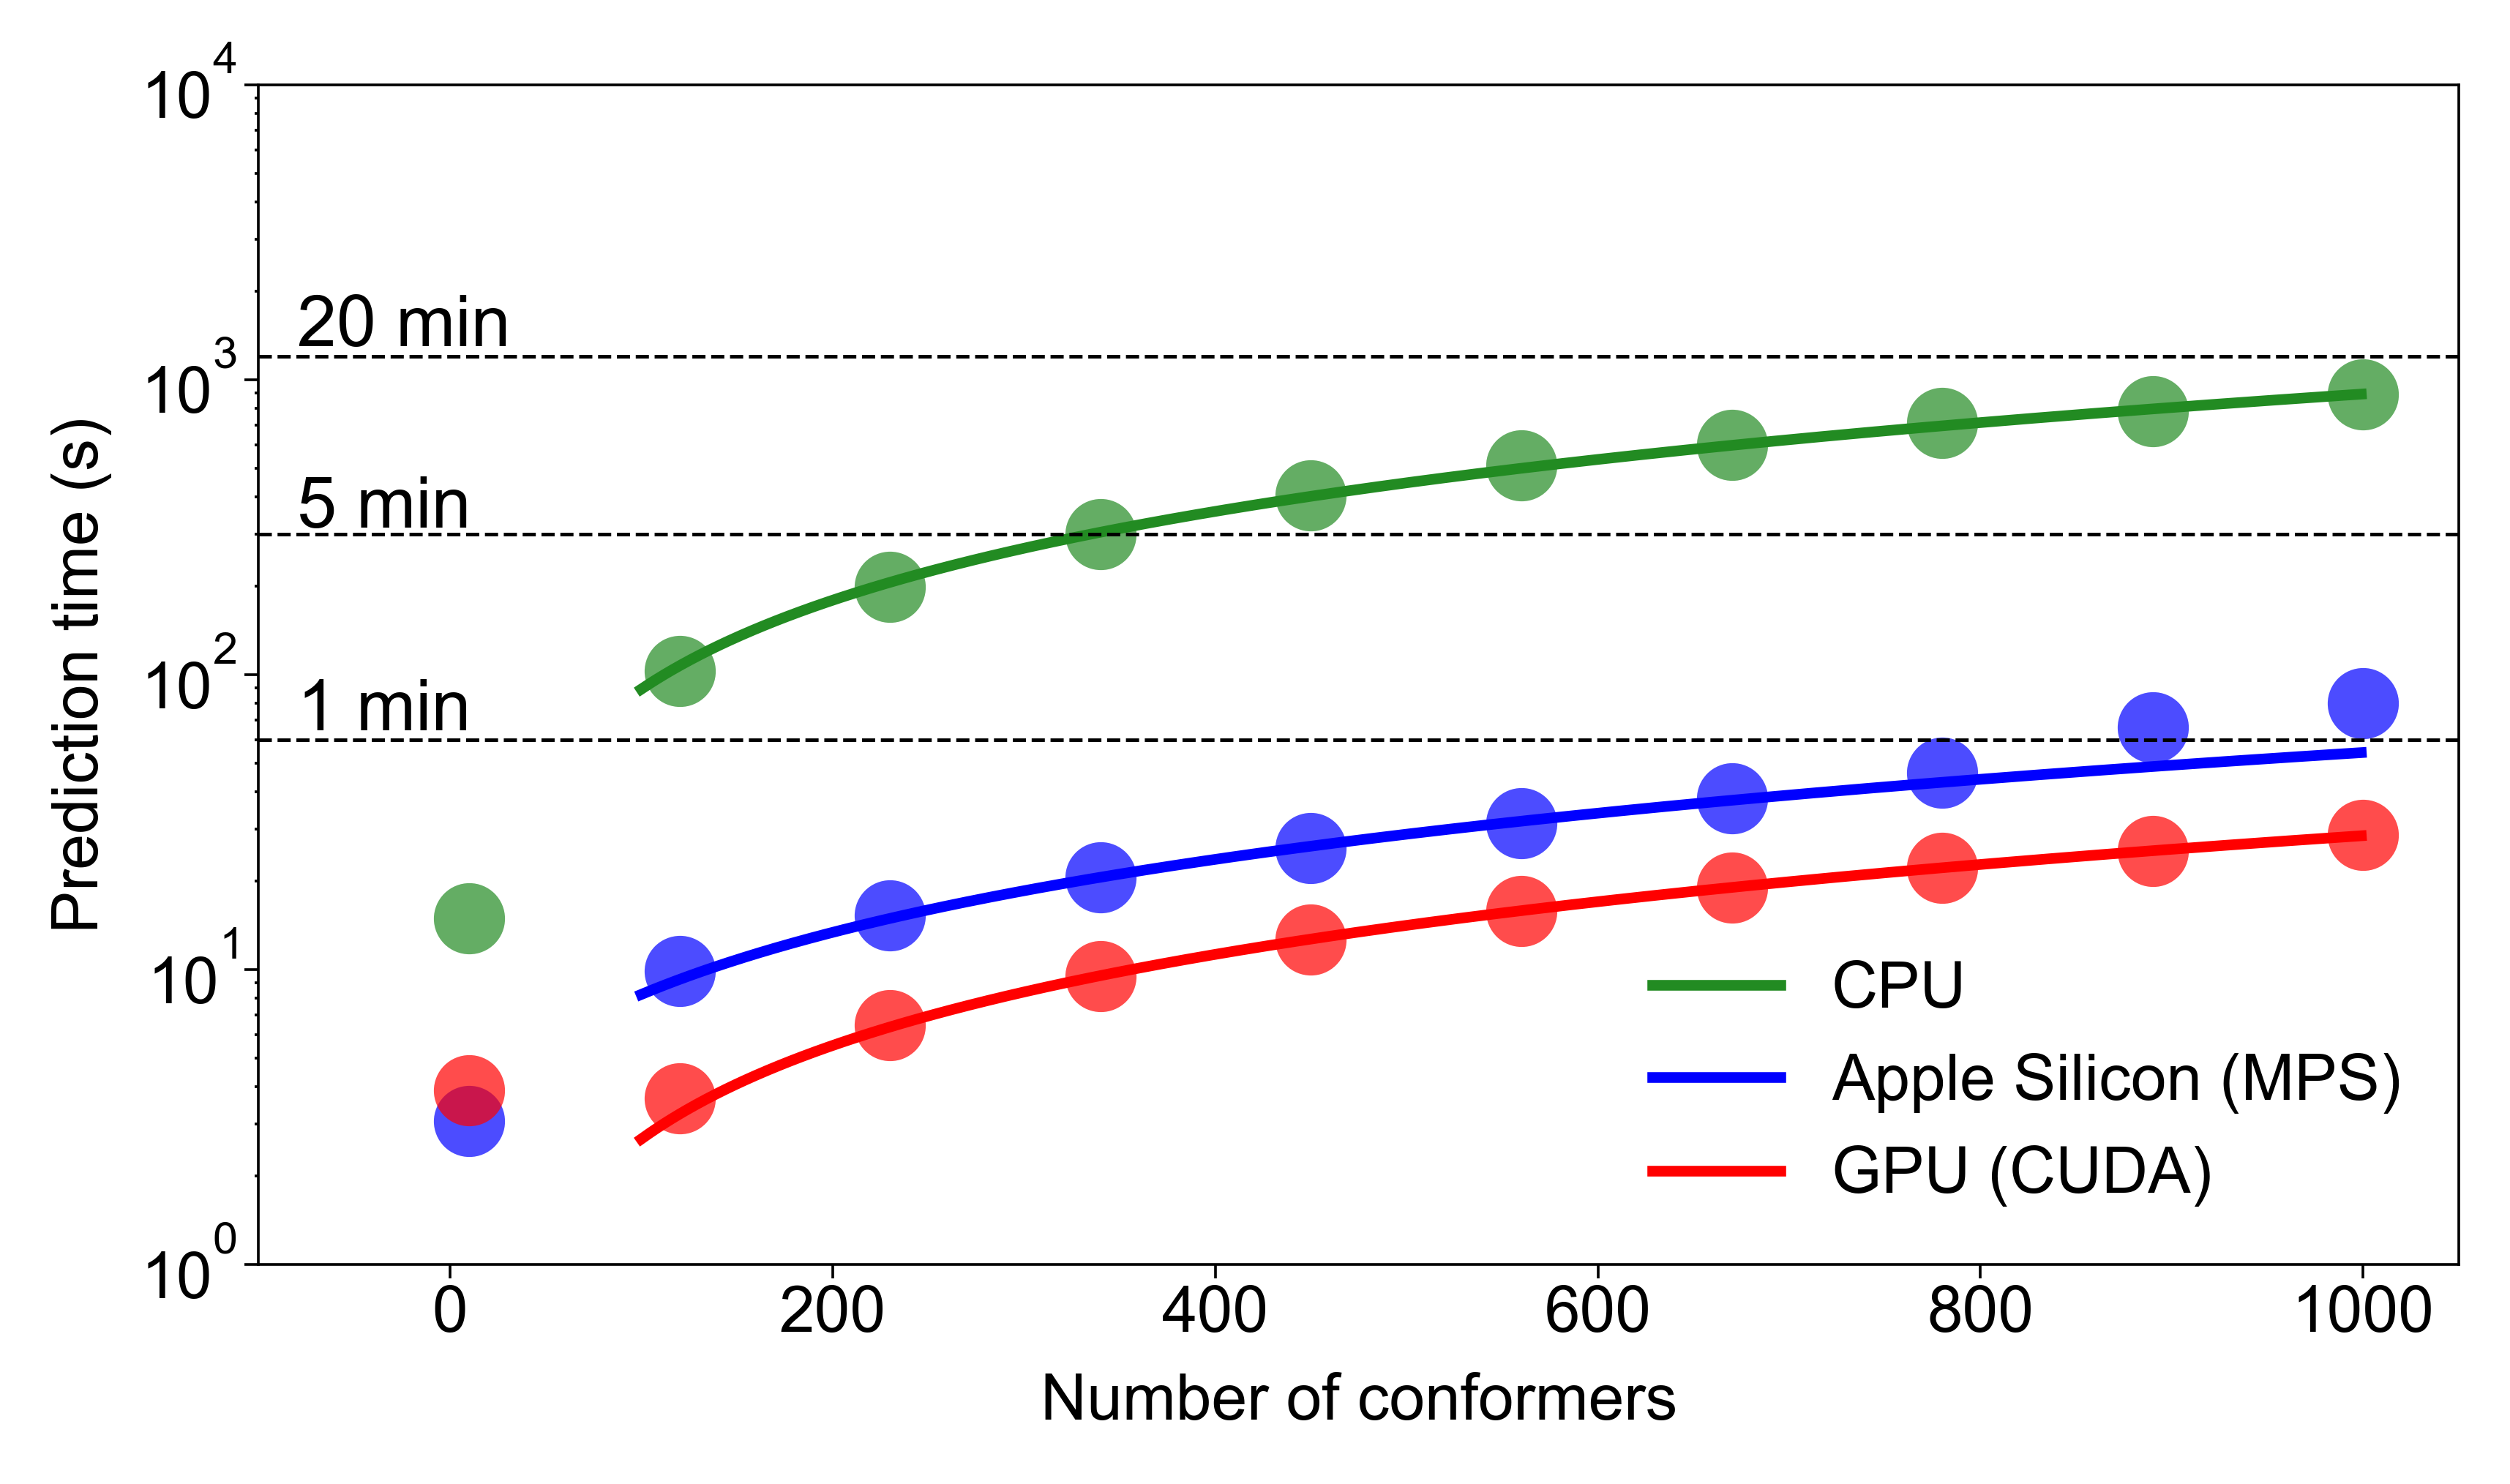

In [3]:
USE_LOG = True

confs_per_second = []
figure(None, (5,3), dpi=350)
ax = plt.gca()

start_idx = 2
end_idx = 7
start_x = 100
end_x = 1000

# cpu
plt.plot(cpu[0], cpu[1],'o', color='forestgreen',ms=10, mew=0, alpha=0.7)
f = np.polyfit(cpu[0][start_idx:], cpu[1][start_idx:],1)
xvals = np.arange(start_x,end_x)
yvals = xvals*f[0]+f[1]
plt.plot(xvals, yvals,'forestgreen', label='CPU')
print(f"CPU gives {round(1/f[0],1)} conformers/second")
confs_per_second.append(1/f[0])

# mps
plt.plot(mps[0], mps[1],'ob',ms=10, mew=0, alpha=0.7)
f = np.polyfit(mps[0][start_idx:end_idx], mps[1][start_idx:end_idx],1)
xvals = np.arange(start_x,end_x)
yvals = xvals*f[0]+f[1]
plt.plot(xvals, yvals,'b', label='Apple Silicon (MPS)')
print(f"Apple Silicon (MPS) gives {round(1/f[0],1)} conformers/second")
confs_per_second.append(1/f[0])

# cuda
plt.plot(cuda[0], cuda[1],'or', ms=10, mew=0, alpha=0.7)
f = np.polyfit(cuda[0][start_idx:], cuda[1][start_idx:],1)
xvals = np.arange(start_x,end_x)
yvals = xvals*f[0]+f[1]
plt.plot(xvals, yvals,'r', label='GPU (CUDA)')
print(f"GPU (CUDA) gives {round(1/f[0],1)} conformers/second")
confs_per_second.append(1/f[0])

# draw on lines to convert seconds to minutes for people because time is hard (!)
ax.axhline(60, color='k', ls='--', lw=0.5)
ax.axhline(60*5, color='k', ls='--', lw=0.5)
ax.axhline(60*20, color='k', ls='--', lw=0.5)


plt.text(-80, 60*5+15, '5 min', fontsize=10)


# build legend
plt.legend(fontsize=9, frameon=False)

# set axes 
plt.ylabel('Prediction time (s)',fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Number of conformers',fontsize=9)
plt.xticks(fontsize=9)
plt.xlim([-100,1050])
#plt.plot(mps_long[0], mps_long[1],'ob',ms=10, mew=0, alpha=0.7)



if USE_LOG:
    plt.yscale('log')
    plt.text(-80, 65, '1 min', fontsize=10)
    plt.text(-80, 60*20+100, '20 min', fontsize=10)
    plt.ylim([1, 10000])
else:
    plt.text(-80, 65+8, '1 min', fontsize=10)
    plt.text(-80, 60*20+15, '20 min', fontsize=10)
    plt.ylim([-100, 1400])

plt.tight_layout()

if USE_LOG:
    plt.savefig('figures/benchmark_fig_logscale.pdf')
else:
    plt.savefig('figures/benchmark_fig.pdf')

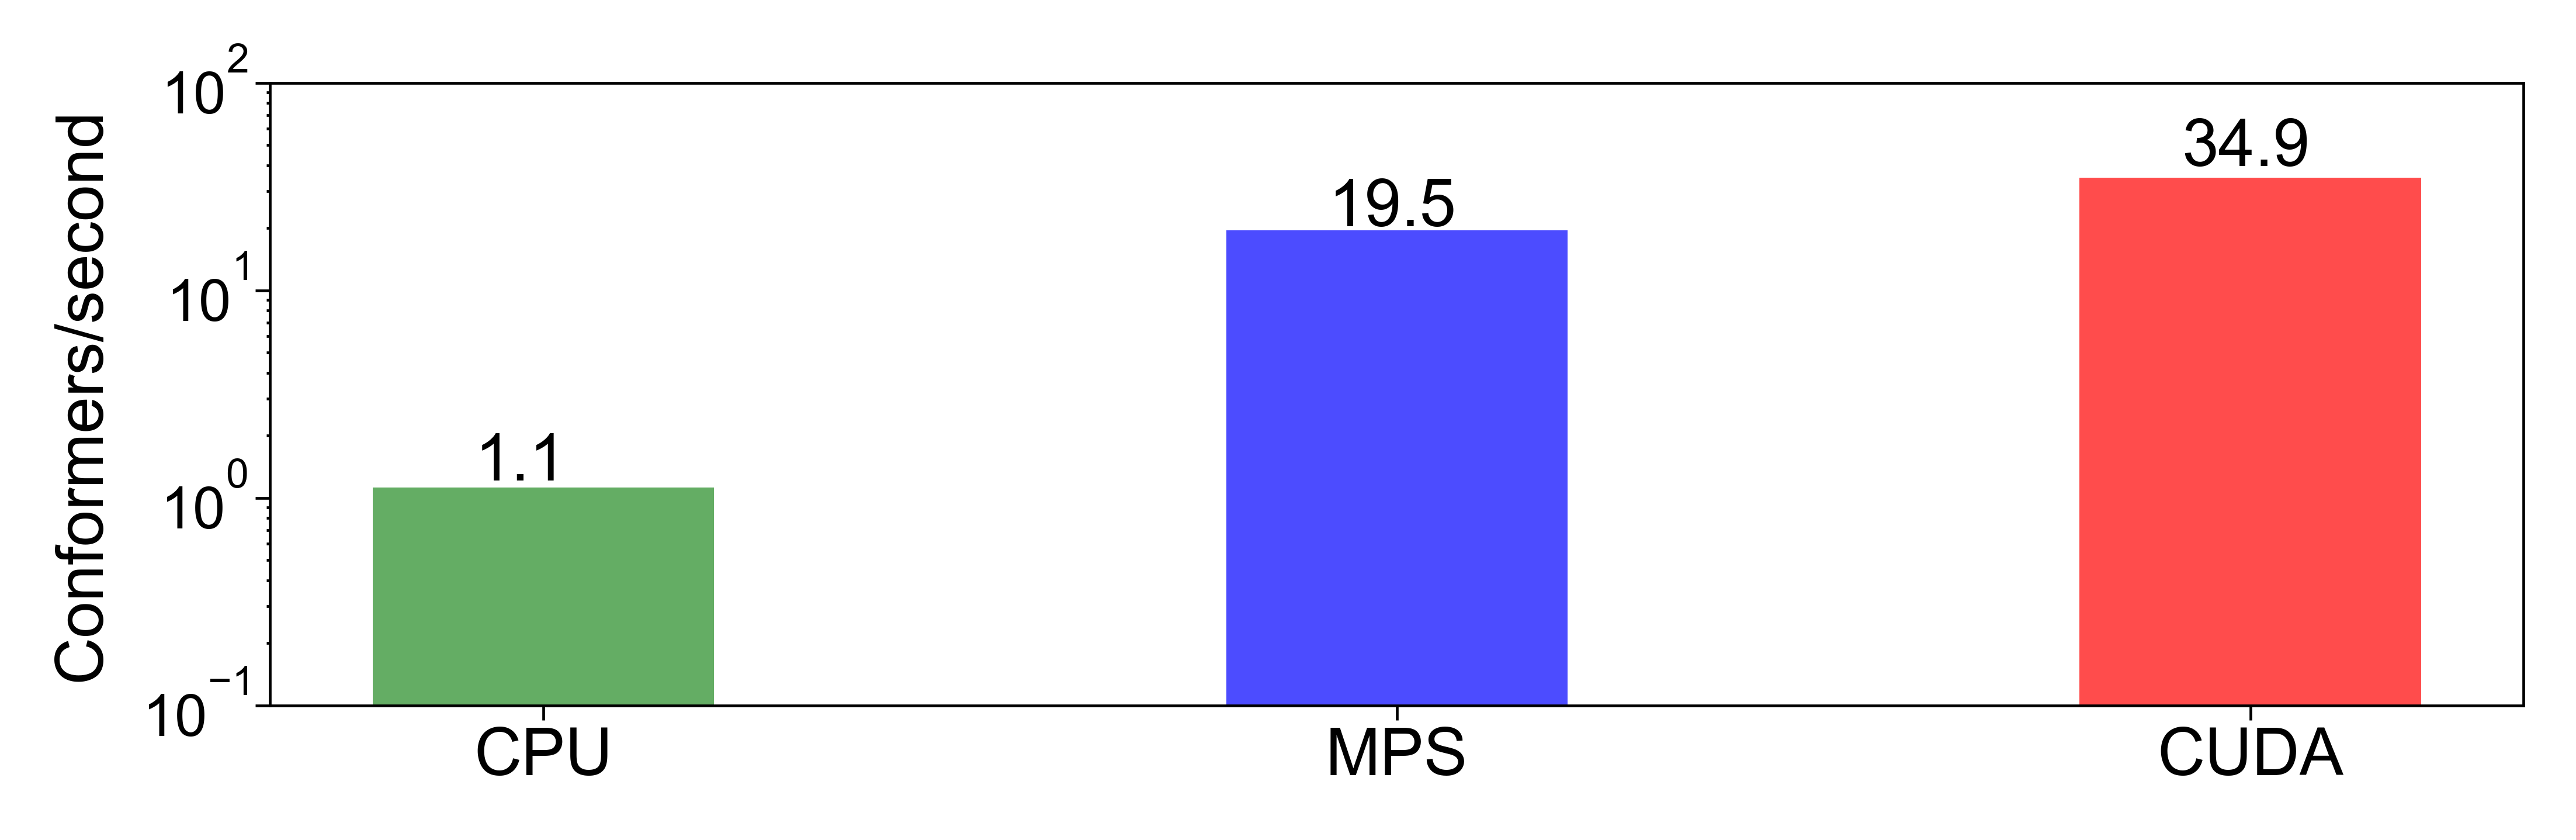

In [4]:
figure(None, (5,1.7), dpi=450)
plt.bar([1], confs_per_second[0], width=0.4, color='forestgreen', alpha=0.7)
plt.bar([2], confs_per_second[1], width=0.4, color='blue', alpha=0.7)
plt.bar([3], confs_per_second[2], width=0.4, color='red', alpha=0.7)
plt.yscale('log')
plt.ylim([0.1,100])
plt.text(0.92, confs_per_second[0]+0.1, round(confs_per_second[0],1), fontsize=9)
plt.text(1.92, confs_per_second[1]+1, round(confs_per_second[1],1), fontsize=9)
plt.text(2.92, confs_per_second[2]+5, round(confs_per_second[2],1), fontsize=9)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.ylabel('Conformers/second',fontsize=9)
plt.xticks([1,2,3], ['CPU', 'MPS', 'CUDA'], fontsize=9)
plt.tight_layout()
plt.savefig('figures/conformers_per_second.pdf')